<a href="https://colab.research.google.com/github/david-adewoyin/machine_learning_from_scatch/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression
### Logistic Regression in Plain Python
In *Logistic Regression* we try to predict the outcome of a **binary** variable from one or more independent variables. Logistic Regression is an example of a binary classification problem where for example we might try to predict whether an email is a *spam/not spam* or whether a student will *pass/ or fail* an exam from one or more independent variables such as hours spent reading and how much class they attended.

### Notation and Definitions:  
- $y:   $    target value $\in \{{0,1}\}$. 
- $\boldsymbol{x}:   $    independent (explanatory) variable also known as the input variable or feature.
- $\alpha:$ is the learning rate which determmines the step size at each iteration
- $\boldsymbol{w},b :   $ are the parameters of the algorithm
- $f_{\boldsymbol{w},b}(x^{(i)}) = g(z):  $ is our prediction for example $i$ using parameters $\boldsymbol{w},b$.
- $\boldsymbol{D} = \{{\boldsymbol{(x^{(1)}},y^{(1)})},...,\boldsymbol{(x^{(n)}},y^{(n)})\}$: is the set of n training examples, where:
    - $\boldsymbol{(x^{(i)}}) $ is the $d$ dimensional input vector ;being the feature vector consisting of$ (x_1,x_2, ...x_d)$ of the training example $\boldsymbol{i}$ 
    - $y^{(i)}$ is the desired output value for that input vector
- $(\boldsymbol{x^{(i)}},y^{(i)})$: an instance of a training example.

### Intuition
<figure style="margin-left:auto;margin-right:auto;text-align:center">
    <img src= "images/sigmoidUnit.png" width="600" style=" margin-left=auto;margin-right=auto;display=block;"/> <br>
       <cite style='text-align:center'><a href ="https://machinelearningmastery.com/a-gentle-introduction-to-sigmoid-function/">machine learning mastery</a></cite><br><br>
    </figure>
A logistic function output values in between 0 and 1 corresponding to the probabilities of y given the independent variable. The output of a linear function which is continuous in nature is fed into a sigmoid function which has the range of values of [0,1].  


### Training 
Unlike the linear model, the logistic model does not have a closed form solution but can only be trained using gradient descent

#### Gradient Descent Algorithm

- Given a set of training examples ${(x^{(n)},y^{(n)})}$: the goal of gradient descent is to minimize the cost function  below through an iterative process.  

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=1}^{m} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1} $$

where the **loss** of a single training data is given as :  
$$  L((f_{\mathbf{w},b}(\mathbf{x}^{(i)}),y^{(i)})) = \begin{cases} \\
- log(f_{\mathbf{w},b}(\mathbf{x}^{(i)})  &   \text{if $y^{(i)} = 1$ }    \\
-log(1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})) & \text{if $y^{(i)} = 0$}
\end{cases}$$ 

**Steps:**   
Step 0: Initialize all weights $\boldsymbol{w}$, and b at random or zero   


**Repeat until convergence {**   
Step 1 : calculate the linear combination of the **feature vectors** $\boldsymbol{x_{i}}$ and weights $\boldsymbol{w},  b$   
Step 2: pass the output of the previous step into the sigmoid function $$ g(z) = \frac{1}{{1+e^{-z}}} \tag{1} $$
where: $0 < g(z) <1$   
Step 3:  calculate the partial derivates of **w** and *b* :


$$  
\begin{align}
\frac{\partial}{\partial w_j} J(\boldsymbol{w},b) = \frac{1}{m}\sum\limits_{i=1}^{m}(g(z) - y^{(i)})x_j^{(i)} \tag{2} \\
\frac{\partial}{\partial b} J(\boldsymbol{w},b) = \frac{1}{m}\sum\limits_{i=1}^{m}(g(z) - y^{(i)}) \tag{3}
\end{align}
$$ 
Step 4: update **w** and *b* :   

$$  
\begin{align}
w_{j} = w_{j} - \alpha \frac{\partial}{\partial w_j} J(\boldsymbol{w},b)  \tag{4} \\ 
b = b - \alpha \frac{\partial}{\partial b} J(\boldsymbol{w},b)  \tag{5}
\end{align}
$$  
**}**  
Below we implement The logistic regression

In [1]:
## Importing required modules
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(126)

In [2]:
#Generating the dataset
X,y=make_blobs(n_samples=1000,centers=2,random_state=123)

In [3]:
# Spliting our dataset into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123)

# X has two features and  1000 examples
print(f"the shape of X_train is {X_train.shape}")

the shape of X_train is (750, 2)


Text(0.5, 1.0, 'Second Against First Feature')

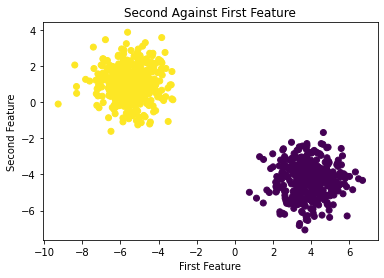

In [4]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Second Against First Feature")

## Logistic Regression

In [5]:
class LogisticRegression:
    
    def __init__(self,learning_rate= 0.001,n_iter=10000,verbose=False):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.verbose = False
    
    def predict(self,X):
        """"
        predict output an hard prediction namely 0 or 1
        """ 
        z = np.dot(self.w,X.T) + self.b
        return self._sigmoid(z) > 0.5
    
    def predict_proba(self,X):
        """"
        predict_proba output soft predictions of probabilities between 0 and 1
        """ 
        z = np.dot(self.w,X.T) + self.b
        return self._sigmoid(z) 
        
    def fit(self,X,y):
        """
        Trains the logistic regression model
        """
        m_rows,n_features  = X.shape # (number of examples, number of features )

        ## initialize  the set of weights and bias to some random value
        self.w =np.zeros((n_features,))
        self.b = 0
        costs= []
        
        for i in range(self.n_iter):
            dj_dw,dj_db = self.gradient(X,y)
            self.w = self.w -  self.learning_rate * dj_dw
            self.b = self.b -  self.learning_rate * dj_db
            
            z = np.dot(self.w,X.T) + self.b
            pred = self._sigmoid(z)
            cost =self._cost_function(pred,y)
            costs.append(cost)
            
            if self.verbose and i % 500 == 0: # print out the value of our costs function at every 500 iterations
                print(f"Cost as iteration {i}: {cost}")
        
    def gradient(self,X,y):
        m_rows,n_features  = X.shape # (number of examples, number of features )
        dj_dw = np.zeros((n_features,))
        dj_db = 0
        
        
        pred = self.predict(X)
        err = pred - y
        
        for i in range(n_features):
            dj_dw[i] = np.sum( err * X[:,i])
        dj_db = np.sum(err)
        
        dj_dw = dj_dw/ m_rows
        dj_db = dj_db/ m_rows
        
        return (dj_dw,dj_db)
    
    def _sigmoid(self,z):
        """"
        Function to calculate the sigmoid function
        """ 
        return 1/(1+np.exp(-z)) 
           
    def _cost_function(self,y_hat,y):
        """"
        Function to calculate the cost 
        """ 
        m_rows = y_hat.shape
        first_part = y * np.log(y_hat)
        second_part = (1 -y) * np.log(1 - y_hat)
       
        cost =  np.sum(first_part  - second_part) / m_rows
        return cost
    
    def score(self,pred,y):
        return np.sum(pred==y)/len(y) 

## Training our model 

In [6]:
## Instantializing our model
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)

##calculating the accuracy of our model on the training set
acc_train=model.score(y_pred_train,y_train)

print(f"accuracy on the training set: {acc_train :.2f}")

accuracy on the training set: 1.00


## Testing our model

In [7]:
## calling predict on the test set
y_pred_test=model.predict(X_test)

## calculating the accuracy of our model 
acc_test = model.score(y_pred_test,y_test)

print(f"accuracy on the testing set: {acc_test}")

accuracy on the testing set: 1.0


Our model has an accuracy of 1.0 on both the training and test set because the dataset is linearly seperable